# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
import csv
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for Open Weather Map API data pull
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# sample data to evaluate data structure
test_url = base_url + "&APPID=" + api_key + "&units=" + units + "&q=" + "richmond"
#print(test_url)
response = requests.get(test_url).json()
#pprint(response)
print(json.dumps(response, indent=2))

{
  "coord": {
    "lon": -123.14,
    "lat": 49.16
  },
  "weather": [
    {
      "id": 802,
      "main": "Clouds",
      "description": "scattered clouds",
      "icon": "03d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 71.02,
    "pressure": 1018,
    "humidity": 72,
    "temp_min": 64.4,
    "temp_max": 77
  },
  "visibility": 48279,
  "wind": {
    "speed": 8.05,
    "deg": 250
  },
  "clouds": {
    "all": 40
  },
  "dt": 1562959986,
  "sys": {
    "type": 1,
    "id": 954,
    "message": 0.0098,
    "country": "CA",
    "sunrise": 1562934030,
    "sunset": 1562991326
  },
  "timezone": -25200,
  "id": 6122085,
  "name": "Richmond",
  "cod": 200
}


In [4]:
# setup api call and record processing loops

search_data = []
city_list = []
country_list = []

query_url = base_url + "&APPID=" + api_key + "&units=" + units + "&q="

count = 0
print("Begin API Call to OpenWeather Database")
print("---------------------------------------")


for city in cities:
    try:
        print(f"Processing record {count} for city: {city}")
        count += 1
        response = requests.get(query_url + city)
        city_json = response.json()
        country_abbrev = city_json['sys']['country']
        city_id = city_json['id']
        search_data.append(city_json)
        city_list.append(city)
        country_list.append(country_abbrev)
        print(f"Record found for city: {city}, country: {country_abbrev} with city id: {city_id}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


print("---------------------------------------")
print("Processing Complete")


Begin API Call to OpenWeather Database
---------------------------------------
Processing record 0 for city: arraial do cabo
Record found for city: arraial do cabo, country: BR with city id: 3471451
Processing record 1 for city: kloulklubed
Record found for city: kloulklubed, country: PW with city id: 7671223
Processing record 2 for city: ponta do sol
Record found for city: ponta do sol, country: BR with city id: 3453439
Processing record 3 for city: jamestown
Record found for city: jamestown, country: AU with city id: 2069194
Processing record 4 for city: punta arenas
Record found for city: punta arenas, country: CL with city id: 3874787
Processing record 5 for city: vaini
Record found for city: vaini, country: IN with city id: 1273574
Processing record 6 for city: sayyan
Record found for city: sayyan, country: YE with city id: 70979
Processing record 7 for city: palmer
Record found for city: palmer, country: AU with city id: 2067070
Processing record 8 for city: crab hill
No weather 

Record found for city: ibra, country: OM with city id: 287832
Processing record 79 for city: khatanga
Record found for city: khatanga, country: RU with city id: 2022572
Processing record 80 for city: cortez
Record found for city: cortez, country: US with city id: 5418104
Processing record 81 for city: lockhart
Record found for city: lockhart, country: AU with city id: 2159774
Processing record 82 for city: tuktoyaktuk
Record found for city: tuktoyaktuk, country: CA with city id: 6170031
Processing record 83 for city: bilibino
Record found for city: bilibino, country: RU with city id: 2126682
Processing record 84 for city: merauke
Record found for city: merauke, country: ID with city id: 2082539
Processing record 85 for city: batagay-alyta
Record found for city: batagay-alyta, country: RU with city id: 2027042
Processing record 86 for city: erenhot
Record found for city: erenhot, country: CN with city id: 2037485
Processing record 87 for city: qasigiannguit
Record found for city: qasigi

Record found for city: dingle, country: PH with city id: 1714733
Processing record 158 for city: tougue
Record found for city: tougue, country: GN with city id: 2414545
Processing record 159 for city: grand river south east
No weather record found for city: grand river south east
Processing record 160 for city: bosaso
Record found for city: bosaso, country: SO with city id: 64013
Processing record 161 for city: saldanha
Record found for city: saldanha, country: PT with city id: 2737599
Processing record 162 for city: sompeta
Record found for city: sompeta, country: IN with city id: 1255816
Processing record 163 for city: sokolo
Record found for city: sokolo, country: ML with city id: 2450849
Processing record 164 for city: hammerfest
Record found for city: hammerfest, country: NO with city id: 779683
Processing record 165 for city: villacarrillo
Record found for city: villacarrillo, country: ES with city id: 2509606
Processing record 166 for city: valparaiso
Record found for city: valp

Record found for city: tigre, country: AR with city id: 3427761
Processing record 237 for city: mehamn
Record found for city: mehamn, country: NO with city id: 778707
Processing record 238 for city: saint george
Record found for city: saint george, country: GR with city id: 262462
Processing record 239 for city: komsomolskiy
Record found for city: komsomolskiy, country: RU with city id: 1486910
Processing record 240 for city: bilma
Record found for city: bilma, country: NE with city id: 2446796
Processing record 241 for city: coffs harbour
Record found for city: coffs harbour, country: AU with city id: 2171085
Processing record 242 for city: puerto madryn
Record found for city: puerto madryn, country: AR with city id: 3840092
Processing record 243 for city: port macquarie
Record found for city: port macquarie, country: AU with city id: 2152659
Processing record 244 for city: caravelas
Record found for city: caravelas, country: BR with city id: 3466980
Processing record 245 for city: po

Record found for city: jiangkou, country: CN with city id: 1814934
Processing record 314 for city: mountain home
Record found for city: mountain home, country: US with city id: 5601615
Processing record 315 for city: saint-augustin
Record found for city: saint-augustin, country: CA with city id: 6138501
Processing record 316 for city: lavrentiya
Record found for city: lavrentiya, country: RU with city id: 4031637
Processing record 317 for city: cherskiy
Record found for city: cherskiy, country: RU with city id: 2126199
Processing record 318 for city: maniitsoq
Record found for city: maniitsoq, country: GL with city id: 3421982
Processing record 319 for city: shaikhpura
Record found for city: shaikhpura, country: IN with city id: 1256698
Processing record 320 for city: mount gambier
Record found for city: mount gambier, country: AU with city id: 2156643
Processing record 321 for city: kalmunai
Record found for city: kalmunai, country: LK with city id: 1242110
Processing record 322 for c

Record found for city: eureka, country: US with city id: 5563397
Processing record 392 for city: esmeralda
Record found for city: esmeralda, country: CL with city id: 3873441
Processing record 393 for city: winnemucca
Record found for city: winnemucca, country: US with city id: 5710360
Processing record 394 for city: sicamous
Record found for city: sicamous, country: CA with city id: 6147353
Processing record 395 for city: khandyga
Record found for city: khandyga, country: RU with city id: 2022773
Processing record 396 for city: la crosse
Record found for city: la crosse, country: US with city id: 5258957
Processing record 397 for city: hofn
Record found for city: hofn, country: IS with city id: 2630299
Processing record 398 for city: bud
Record found for city: bud, country: NO with city id: 7626370
Processing record 399 for city: meulaboh
Record found for city: meulaboh, country: ID with city id: 1214488
Processing record 400 for city: san patricio
Record found for city: san patricio,

Record found for city: burnie, country: AU with city id: 2173125
Processing record 469 for city: tsentralnyy
No weather record found for city: tsentralnyy
Processing record 470 for city: chiang khong
Record found for city: chiang khong, country: LA with city id: 1611197
Processing record 471 for city: haines junction
Record found for city: haines junction, country: CA with city id: 5969025
Processing record 472 for city: asau
No weather record found for city: asau
Processing record 473 for city: comodoro rivadavia
Record found for city: comodoro rivadavia, country: AR with city id: 3860443
Processing record 474 for city: saint anthony
Record found for city: saint anthony, country: US with city id: 5606187
Processing record 475 for city: lagoa
Record found for city: lagoa, country: PT with city id: 2267254
Processing record 476 for city: konevo
Record found for city: konevo, country: BG with city id: 726885
Processing record 477 for city: saint-pierre
Record found for city: saint-pierre

Record found for city: srednyaya akhtuba, country: RU with city id: 489446
Processing record 549 for city: lalmohan
Record found for city: lalmohan, country: BD with city id: 1185251
Processing record 550 for city: nelson bay
Record found for city: nelson bay, country: AU with city id: 2155562
Processing record 551 for city: ambulu
Record found for city: ambulu, country: ID with city id: 1621313
Processing record 552 for city: hobyo
Record found for city: hobyo, country: SO with city id: 57000
Processing record 553 for city: ndjole
Record found for city: ndjole, country: GA with city id: 2397674
Processing record 554 for city: mitsamiouli
Record found for city: mitsamiouli, country: KM with city id: 921786
Processing record 555 for city: margate
Record found for city: margate, country: AU with city id: 2158744
Processing record 556 for city: bur gabo
No weather record found for city: bur gabo
Processing record 557 for city: marsh harbour
Record found for city: marsh harbour, country: B

In [5]:
len(search_data)

522

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Get selected data gather from "search_data" list, created above

lat_list =  [data.get("coord").get("lat") for data in search_data]
lng_list = [data.get("coord").get("lon") for data in search_data]
temp_list = [data.get("main").get("temp") for data in search_data]
humid_list = [data.get("main").get("humidity") for data in search_data]
cloud_list =[data.get("clouds").get("all") for data in search_data]
wind_list = [data.get("wind").get("speed") for data in search_data]

In [7]:
# Setup df to hold city data
cities_df = pd.DataFrame({"City Name":city_list, 
                          "Country Code":country_list, 
                          "Latitude":lat_list, 
                          "Longitude":lng_list,
                          "Temp (F)":temp_list,
                          "Humidity (%)":humid_list,
                          "Cloudiness (%)":cloud_list,
                          "Wind Speed (mph)":wind_list})

cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 8 columns):
City Name           522 non-null object
Country Code        522 non-null object
Latitude            522 non-null float64
Longitude           522 non-null float64
Temp (F)            522 non-null float64
Humidity (%)        522 non-null int64
Cloudiness (%)      522 non-null int64
Wind Speed (mph)    522 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 32.7+ KB


In [14]:
# Export data frame to csv file

cities_df.to_csv(output_data_file)

In [15]:
cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,arraial do cabo,BR,-22.97,-42.02,76.12,69,0,9.17
1,kloulklubed,PW,7.04,134.26,78.80,88,90,12.75
2,ponta do sol,BR,-20.63,-46.00,62.84,52,0,0.87
3,jamestown,AU,-33.21,138.60,39.98,91,37,6.76
4,punta arenas,CL,-53.16,-70.91,42.37,93,90,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

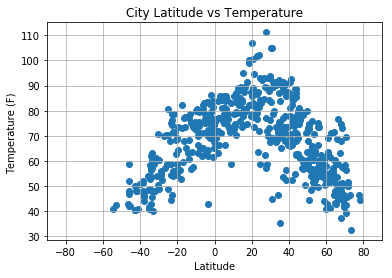

In [25]:
# Latitude vs Temperature
plt.scatter(cities_df["Latitude"], cities_df["Temp (F)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

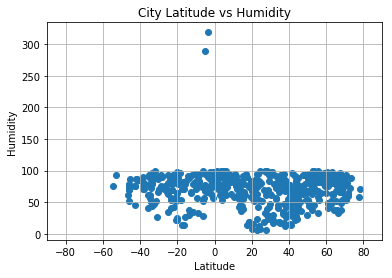

In [29]:
# Latitude vs Humidity
plt.scatter(cities_df["Latitude"], cities_df["Humidity (%)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

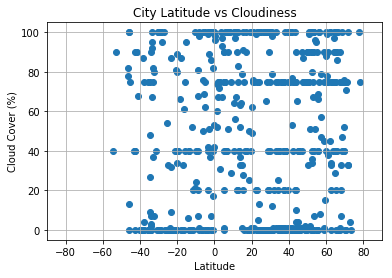

In [27]:
# Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness (%)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

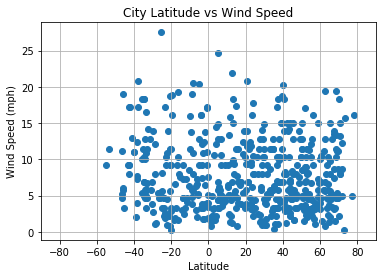

In [28]:
# Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed (mph)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-WindSpeed.png")

# Show plot
plt.show()

In [24]:
# export DF to HTML
cities_df.to_html(buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, justify=None, bold_rows=True, classes=None, escape=True, max_rows=None, max_cols=None, show_dimensions=False, notebook=False)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City Name</th>\n      <th>Country Code</th>\n      <th>Latitude</th>\n      <th>Longitude</th>\n      <th>Temp (F)</th>\n      <th>Humidity (%)</th>\n      <th>Cloudiness (%)</th>\n      <th>Wind Speed (mph)</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>arraial do cabo</td>\n      <td>BR</td>\n      <td>-22.97</td>\n      <td>-42.02</td>\n      <td>76.12</td>\n      <td>69</td>\n      <td>0</td>\n      <td>9.17</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>kloulklubed</td>\n      <td>PW</td>\n      <td>7.04</td>\n      <td>134.26</td>\n      <td>78.80</td>\n      <td>88</td>\n      <td>90</td>\n      <td>12.75</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>ponta do sol</td>\n      <td>BR</td>\n      <td>-20.63</td>\n      <td>-46.00</td>\n      <td>62.84</td>\n      <td>52</td>\n      <td>0</td>\n      <td>0.87</td>\n    </tr